Nil Mazouzi More 1674092 <br>
Jan Sans Domingo 1673276

In [70]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, roc_curve, precision_recall_curve, classification_report, make_scorer, auc, recall_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

<h2>EDA (exploratory data analysis)</h2>

Abans de començar a fer res, anem a veure com és la base de dades del problema.

La web del Kaggle ens  descriu els nostres atributs, i nosaltres els classifiquem segons aquesta descripció:
| Atribut                     | Tipus              | Descripció                                                                       |
|-----------------------------|--------------------|----------------------------------------------------------------------------------|
| class                       | Binari (Target)    | classes: edible=e, poisonous=p                                                  |
| cap-shape                   | Categòric          | cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s             |
| cap-surface                 | Categòric          | cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s                            |
| cap-color                   | Categòric          | cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y |
| bruises                     | Binari             | bruises: bruises=t, no=f                                                        |
| odor                        | Categòric          | odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s |
| gill-attachment             | Categòric          | gill-attachment: attached=a, descending=d, free=f, notched=n                    |
| gill-spacing                | Categòric          | gill-spacing: close=c, crowded=w, distant=d                                     |
| gill-size                   | Binari             | gill-size: broad=b, narrow=n                                                    |
| gill-color                  | Categòric          | gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y |
| stalk-shape                 | Binari             | stalk-shape: enlarging=e, tapering=t                                            |
| stalk-root                  | Categòric          | stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? |
| stalk-surface-above-ring    | Categòric          | stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s                 |
| stalk-surface-below-ring    | Categòric          | stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s                 |
| stalk-color-above-ring      | Categòric          | stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y |
| stalk-color-below-ring      | Categòric          | stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y |
| veil-type                   | Categòric          | veil-type: partial=p, universal=u                                               |
| veil-color                  | Categòric          | veil-color: brown=n, orange=o, white=w, yellow=y                                |
| ring-number                 | Categòric          | ring-number: none=n, one=o, two=t                                               |
| ring-type                   | Categòric          | ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z |
| spore-print-color           | Categòric          | spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y |
| population                  | Categòric          | population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y |
| habitat                     | Categòric          | habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d     |

Veiem que el nostre target és class, que és un atribut binari que representa si el bolet és comestible o n (e = comestible, p = no comestible)

Si ens fixem, podem observar que a la descripció de la web del Kaggle ens diu que a l'atribut "stalk-root" els missing values o nans, es representen amb un interrogant.


En quant a la distribució, la pàgina del Kaggle ens proporciona la següent informació:
| Atribut           | Categories/Valors | Distribució                              | Valid (%) | Mismatched (%) | Missing (%) | Unique | Most Common |
|--------------------|-------------------|------------------------------------------|-----------|----------------|-------------|--------|-------------|
| class             | edible=e, poisonous=p | e: 52%, p: 48%                          | 100%      | 0%             | 0%          | 2      | e (52%)     |
| cap-shape         | bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s | x: 45%, f: 39%, Other: 16%              | 100%      | 0%             | 0%          | 6      | x (45%)     |
| cap-surface       | fibrous=f, grooves=g, scaly=y, smooth=s | y: 40%, s: 31%, Other: 29%              | 100%      | 0%             | 0%          | 4      | y (40%)     |
| cap-color         | brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y | n: 28%, g: 23%, Other: 49% | 100%      | 0%             | 0%          | 10     | n (28%)     |
| bruises           | bruises=t, no=f   | [No valid data provided]                 | 0%        | 100%           | 0%          | 0      | N/A         |
| odor              | almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s | n: 43%, f: 27%, Other: 30% | 100%      | 0%             | 0%          | 9      | n (43%)     |
| gill-attachment   | attached=a, descending=d, free=f, notched=n | [No valid data provided]                 | 0%        | 100%           | 0%          | 0      | N/A         |
| gill-spacing      | close=c, crowded=w, distant=d | c: 84%, w: 16%                          | 100%      | 0%             | 0%          | 2      | c (84%)     |
| gill-size         | broad=b, narrow=n | b: 69%, n: 31%                          | 100%      | 0%             | 0%          | 2      | b (69%)     |
| gill-color        | black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y | b: 21%, p: 18%, Other: 60% | 100% | 0%             | 0%          | 12     | b (21%)     |

Podem veure que el target, que és l'atribut class està prou balancejat, lo qual significa que els models podran classificar efectivament "class" sense necessitar de reajustar aquest atribut. Això pot significar que podrem utilzar l'accuracy com a mesura. No podriem fer-ho si estigues desbalancejat (p.e. 85% e, 15% p), ja que si el model classifiqués tots els bolets com a edible tindria una accuracy del 85% i pot ser molt perillòs, ja que classificar un bolet com a comestible quan en realitat és verinós pot tenir series conseqüències.





In [71]:
file_path = 'mushrooms.csv'
df = pd.read_csv(file_path)

df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Com podem veure, el dataset té 23 atributs: class ,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population i habitat.





<h2>Data Preprocessing</h2>

Tots els atributs són categòrics o binaris i per tant, no caldrà fer tractament d'atributs continus. Tenint 23 atributs, sabem que molts no seran necessaris per determinar si un bolet és comestible o no. Segurament molts només aportaran soroll i faran que el nostre model es sobreajusti a les dades. Mirem la matriu de correlació per veure quins són els atributs que tenen correlació amb el nostre target "class". D'aquesta manera, ens quedarem amb els que passin un llindar de 0.3 escollit per nosaltres, que creiem que així només tindrem els atributs que realment importen per classificar.


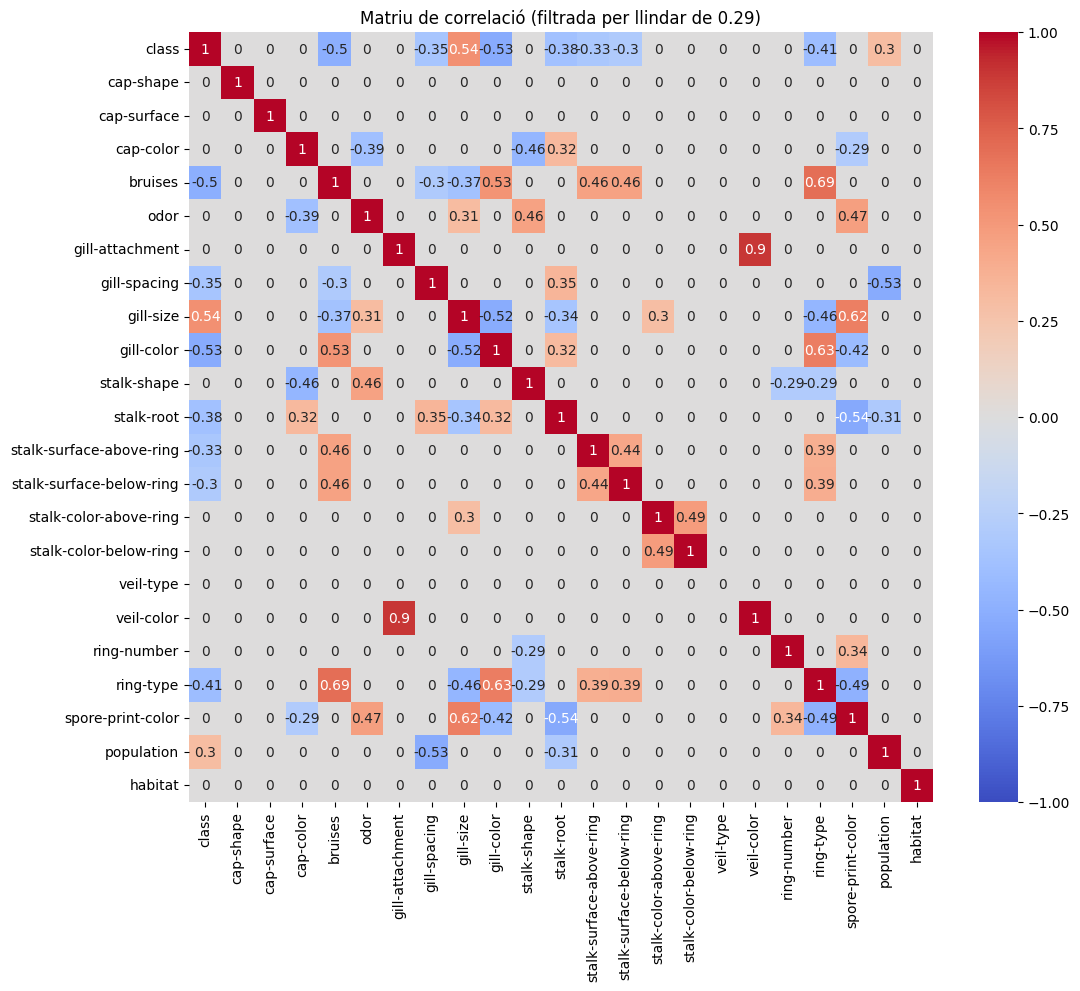

In [72]:
# Codificar temporalmente las columnas categóricas

encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(df)

# Calcular la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = pd.DataFrame(encoded_data, columns=df.columns).corr()
target_column = 'class'
target_correlation = correlation_matrix[target_column]
threshold = 0.29
filtered_correlation = correlation_matrix.where(np.abs(correlation_matrix) > threshold, other=0)
relevant_columns = filtered_correlation[np.abs(target_correlation) > threshold].index
df_tractat = df[relevant_columns]


plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriu de correlació (filtrada per llindar de 0.29)")
plt.show()

Ara mirem els valors nans, quin percentatge de dades són nans per cada atribut

In [73]:
def print_nans(df):
    nan_percentages = (df == '?').mean() * 100
    for col, percentage in nan_percentages.items():
        print(f"{col}: {percentage:.2f}%")

print_nans(df)


class: 0.00%
cap-shape: 0.00%
cap-surface: 0.00%
cap-color: 0.00%
bruises: 0.00%
odor: 0.00%
gill-attachment: 0.00%
gill-spacing: 0.00%
gill-size: 0.00%
gill-color: 0.00%
stalk-shape: 0.00%
stalk-root: 30.53%
stalk-surface-above-ring: 0.00%
stalk-surface-below-ring: 0.00%
stalk-color-above-ring: 0.00%
stalk-color-below-ring: 0.00%
veil-type: 0.00%
veil-color: 0.00%
ring-number: 0.00%
ring-type: 0.00%
spore-print-color: 0.00%
population: 0.00%
habitat: 0.00%


Com podem veure, només trobem valors nans a stalk-root. 

Omplim els NaNs segons les proporcions de la distribucio de les classes tenint en conte el nostre target

In [83]:

target_probs = {'p': 0.7, 'e': 0.3}  # Si necesitas estas proporciones explícitas
stalk_root_probs_p = {'b': 0.86, 'c': 0.02, 'e': 0.12}
stalk_root_probs_e = {'b': 0.55, 'c': 0.15, 'e': 0.245, 'r': 0.055}

missing_rows = df_tractat[df_tractat['stalk-root'] == '?']

missing_p = missing_rows[missing_rows['class'] == 'p']
missing_e = missing_rows[missing_rows['class'] == 'e']

imputed_p = np.random.choice(
    list(stalk_root_probs_p.keys()),
    size=len(missing_p),
    p=list(stalk_root_probs_p.values())
)

imputed_e = np.random.choice(
    list(stalk_root_probs_e.keys()),
    size=len(missing_e),
    p=list(stalk_root_probs_e.values())
)

df_tractat.loc[missing_p.index, 'stalk-root'] = imputed_p
df_tractat.loc[missing_e.index, 'stalk-root'] = imputed_e

Comprovem si queda algun NaN després de la inserció

In [ ]:
missing_after = df_tractat[df_tractat['stalk-root'] == '?'].shape[0]
print(f"Valores faltantes en 'stalk-root' después de la imputación: {missing_after}")


Valores faltantes en 'stalk-root' después de la imputación: 0
Distribución de 'stalk-root' para class = p:
Series([], Name: proportion, dtype: float64)
Distribución de 'stalk-root' para class = e:
Series([], Name: proportion, dtype: float64)


Convertim ara les dades categòriques a numèriques per poder tractar-les més fàcilment amb LabelEncoder de la manera: [p,e] a [0,1]

In [85]:
label_encoder = LabelEncoder()
for col in df_tractat.select_dtypes(include='object').columns:
    df_tractat[col] = label_encoder.fit_transform(df_tractat[col])

X = df_tractat.drop('class', axis=1)
y = df_tractat['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>Metric Selection</h2>

Com hem pogut veure al EDA, el nostre dataset està balancejat, així que podríem utilitzar accuracy com la nostra mètrica estrella. Però per escollir el millor model, a part de tenir en compte l'accuracy, sobretot tindrem en compte el Recall. Això és degut a que, al tractar amb si un bolet és verinós o no, preferim donar falsos positius abans que falsos negatius. És millor evitar menjar un bolet pensant que és verinós  quan en realitat no ho és, que menjar-se'n un que sí que és verinós pensant que no ho és.

In [88]:
models = {
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Recall: {recall:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
 

Model: SVM
Recall: 0.95
Accuracy: 0.97
Model: Logistic Regression
Recall: 0.94
Accuracy: 0.94


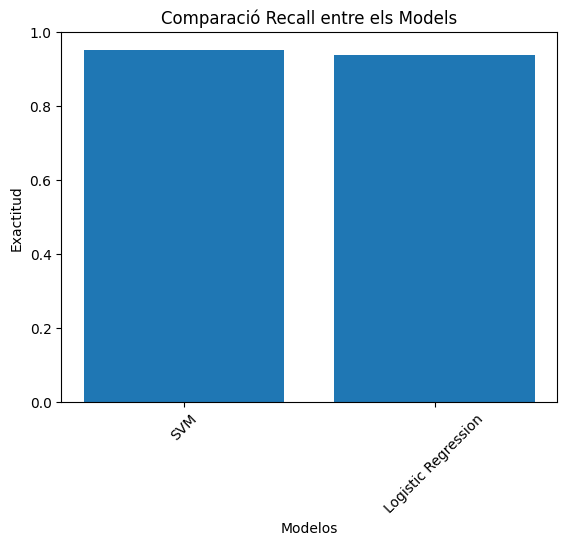

In [89]:
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = recall_score(y_test, y_pred)

plt.bar(results.keys(), results.values())
plt.title('Comparació Recall entre els Models')
plt.ylabel('Exactitud')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.show()

Com que seguim obtenint resultats massa obtims, mirarem la correlacio entre les diferents classes per mirar si hi ha alguna categoria que s'ajusta molt al nostre tarjet

<h2>Model Selection amb Validació Creuada</h2>
No hi ha cap categoria que tingui un valor fora del normal, per tant, passarem autilitzar la validació creuada, per si el model sesta ajustant massa al set utilitzat

In [79]:
from sklearn.neighbors import KNeighborsClassifier

param_grids = {
    "SVM": {
        "model": SVC(random_state=42),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ['linear', 'rbf', 'poly'],
            "gamma": ['scale', 'auto']
        }
    },
    "Regressió Logística": {
        "model": LogisticRegression(random_state=42),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ['l2'],
            "solver": ['lbfgs', 'saga']
        }
    }
}

best_estimators = {}
for name, config in param_grids.items():
    print(f"Optimitzant {name}...")
    model = config["model"]
    params = config["params"]
    
    grid_search = GridSearchCV(estimator=model, param_grid=params, 
                               cv=5, scoring='recall', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_estimators[name] = grid_search.best_estimator_
    print(f"Millors paràmetres per {name}: {grid_search.best_params_}")
    print(f"Millor recall per {name}: {grid_search.best_score_:.2f}")
    print("-" * 40)


Optimitzant SVM...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Millors paràmetres per SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Millor recall per SVM: 0.98
----------------------------------------
Optimitzant Regressió Logística...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Millors paràmetres per Regressió Logística: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Millor recall per Regressió Logística: 0.93
----------------------------------------
